In [1]:
import pandas as pd 

fake_df = pd.read_csv(r"dataset\fake.csv")  

true_df = pd.read_csv(r"dataset\true.csv")  

# Add a label column to indicate the news type
fake_df['label'] = 'Fake'  # Label all rows in fake news dataset as 'Fake'
true_df['label'] = 'Real'  # Label all rows in real news dataset as 'Real'

# Combine both datasets into a single DataFrame
df = pd.concat([fake_df, true_df], ignore_index=True)  # Merge datasets and reset the index

# Check the first 5 rows to verify the data
df.head() # Display first 5 rows


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [2]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",Fake
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",Real
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",Real
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",Fake
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",Real


In [3]:
# Count the number of Real vs Fake news entries
df['label'].value_counts() # Show the distribution of labels

label
Fake    23481
Real    21417
Name: count, dtype: int64

In [4]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(209)

In [6]:
df.drop_duplicates(inplace=True)


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop(columns=['date'], inplace=True)
df.head()

,title,text,subject,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,Fake
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,Real
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,Real
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,Fake
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,Real


In [9]:
#convert label column into category datatype
col=["label"]
df[col]=df[col].astype('category')
pd.DataFrame(df.dtypes).T

,title,text,subject,label
0,object,object,object,category


In [10]:
# Convert labels to 0/1
df["label"] = df["label"].map({"Real": 0, "Fake": 1})
df.head()

,title,text,subject,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,1
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,0
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,0
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,1
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,0


In [11]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# -------------------------
# Download necessary NLTK resources
# -------------------------
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# -------------------------
# Stopwords + Lemmatizer
# -------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# -------------------------
# Preprocessing function
# -------------------------
def preprocess_text(text):
    text = text.lower().strip()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# -------------------------
# 1) Apply preprocessing
# -------------------------
for col in ['text', 'title', 'subject']:
    df[col + '_clean'] = df[col].astype(str).apply(preprocess_text)

# -------------------------
# 2) Split BEFORE TF-IDF
# -------------------------
X = df[['title_clean', 'subject_clean', 'text_clean']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


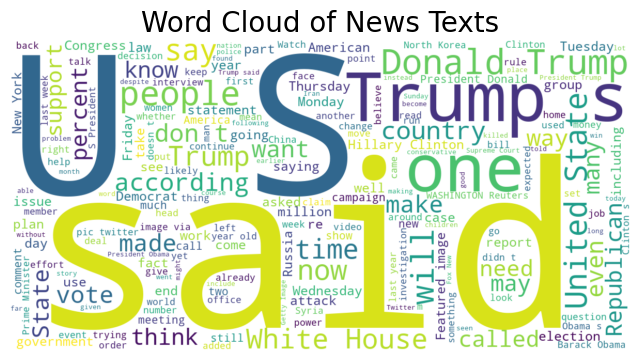

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all text for the Word Cloud
all_text = " ".join(df['text'].astype(str))  # df is your DataFrame

# Generate Word Cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',  # Choose any color map you like
    max_words=200
).generate(all_text)

# Plot the Word Cloud
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of News Texts", fontsize=20)
plt.show()


In [13]:
# 3) TF-IDF on all text combined
# -------------------------
X_train_joined = (X_train['title_clean'] + ' ' +
                  X_train['subject_clean'] + ' ' +
                  X_train['text_clean'])

X_test_joined = (X_test['title_clean'] + ' ' +
                 X_test['subject_clean'] + ' ' +
                 X_test['text_clean'])

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_joined)
X_test_tfidf = tfidf.transform(X_test_joined)

# -------------------------
# 4) Apply SMOTE for oversampling
# -------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

In [14]:
# -------------------------
# 5) Train Logistic Regression
# -------------------------
logreg = LogisticRegression(max_iter=5, random_state=42, class_weight='balanced')
logreg.fit(X_train_res, y_train_res)

# Predictions
y_train_pred = logreg.predict(X_train_res)
y_test_pred = logreg.predict(X_test_tfidf)

# -------------------------
# 6) Evaluation
# -------------------------
print("Train Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))




Train Accuracy: 0.9454530933872857
Test Accuracy: 0.9433877825016782

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4242
           1       0.95      0.94      0.95      4696

    accuracy                           0.94      8938
   macro avg       0.94      0.94      0.94      8938
weighted avg       0.94      0.94      0.94      8938



c:\Users\mms2023\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
import pickle

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save trained Logistic Regression model
with open('logreg_model.pkl', 'wb') as f:
    pickle.dump(logreg, f)

print("Model and TF-IDF vectorizer saved successfully.")


Model and TF-IDF vectorizer saved successfully.
